In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/Self Development/Portfolio/Badmintrack

/content/drive/MyDrive/Self Development/Portfolio/Badmintrack


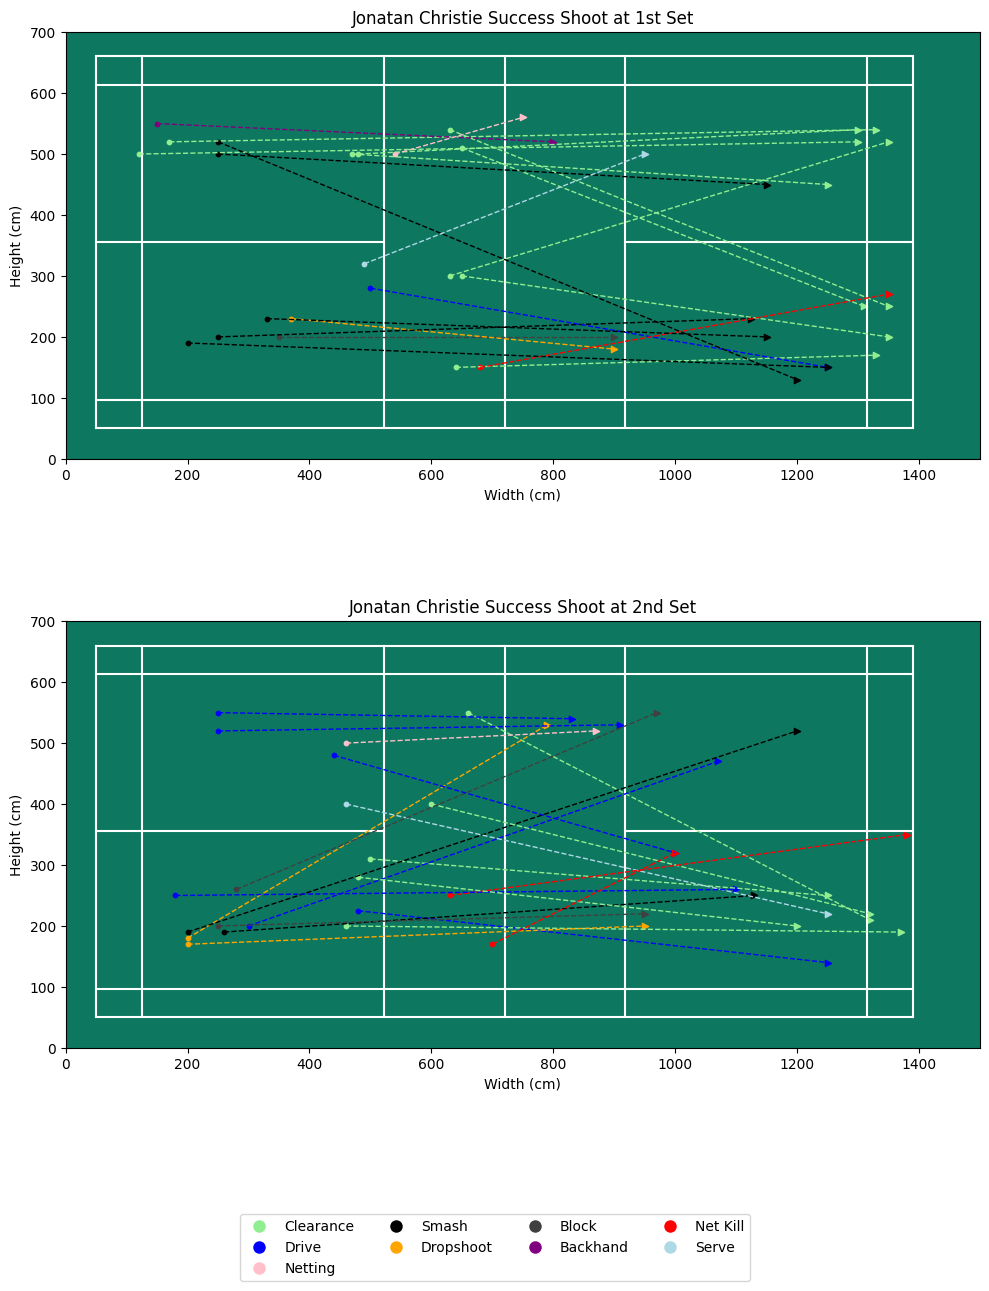

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the spreadsheet file (replace with your actual file path)
file_path = 'Jonatan Christie Last Touch Data (Final All England 2024).xlsx'
df = pd.read_excel(file_path)

# Filter for Set 1 and Success points
set_1_df = df[df['Set'] == 1]
success_points_set_1 = set_1_df[set_1_df['Status'] == 'Success']
# Filter for Set 2 and Success points
set_2_df = df[df['Set'] == 2]
success_points_set_2 = set_2_df[set_2_df['Status'] == 'Success']

# Define coordinates for the badminton court lines
coordinates = {
    "line 1": [(50, 50), (50, 96), (50, 355), (50, 614), (50, 660)],
    "line 2": [(126, 50), (126, 96), (126, 355), (126, 614), (126, 660)],
    "line 3": [(522, 50), (522, 96), (522, 355), (522, 614), (522, 660)],
    "line 4": [(720, 50), (720, 96), (720, 355), (720, 614), (720, 660)],
    "line 5": [(918, 50), (918, 96), (918, 355), (918, 614), (918, 660)],
    "line 6": [(1314, 50), (1314, 96), (1314, 355), (1314, 614), (1314, 660)],
    "line 7": [(1390, 50), (1390, 96), (1390, 355), (1390, 614), (1390, 660)]
}

def draw_court(ax):
    # Plot the points and connect lines
    for i in range(5):  # Iterate over each coordinate
        for name, coords in coordinates.items():
            if name == "line 1":
                if i != 2:  # Exclude third coordinate of line 1
                    ax.plot([coords[i][0], coordinates["line 7"][i][0]], [coords[i][1], coordinates["line 7"][i][1]], color='white')
                else:  # Connect third coordinate of line 1 with line 3
                    ax.plot([coords[i][0], coordinates["line 3"][i][0]], [coords[i][1], coordinates["line 3"][i][1]], color='white')
            elif name == "line 5" and i == 2:  # Connect third coordinate of line 5 with line 7
                ax.plot([coords[i][0], coordinates["line 7"][i][0]], [coords[i][1], coordinates["line 7"][i][1]], color='white')
    # Connect first and last coordinates for every line
    for name, coords in coordinates.items():
        ax.plot([coords[0][0], coords[-1][0]], [coords[0][1], coords[-1][1]], color='white')
    # Set limits and labels
    ax.set_xlim(0, 1500)
    ax.set_ylim(700, 0)
    ax.set_xlabel('Width (cm)')
    ax.set_ylabel('Height (cm)')
    ax.set_aspect('equal', adjustable='box')
    ax.invert_yaxis()  # Invert y-axis to match the orientation of the court

# Create a dictionary to map each type of hit to its corresponding color
hit_colors = {
    'Clearance': 'lightgreen',
    'Drive': 'blue',
    'Netting': 'pink',
    'Smash': 'black',
    'Dropshoot': '#FFA500',
    'Block': '#404040',
    'Backhand': 'purple',
    'Net Kill': 'red',
    'Serve': 'lightblue',
}

# Create a figure and subplots
fig, axs = plt.subplots(2, 1, figsize=(10, 12))
# Background Color
axs[0].set_facecolor('#0d785f')
axs[1].set_facecolor('#0d785f')
# Set 1
draw_court(axs[0])
axs[0].set_title('Jonatan Christie Success Shoot at 1st Set')
# Set 2
draw_court(axs[1])
axs[1].set_title('Jonatan Christie Success Shoot at 2nd Set')

for index, row in success_points_set_1.iterrows():
    x_lh = row['Last Hit Coordinate (X)']
    y_lh = row['Last Hit Coordinate (Y)']
    x_ls = row['Point Coordinate (X)']
    y_ls = row['Point Coordinate (Y)']
    hit_type = row['Type of Hit']
    color = hit_colors.get(hit_type, 'black')
    # Shoot Plot
    axs[0].scatter(x_lh, y_lh, color=color, s=10)
    axs[0].scatter(x_ls, y_ls, color=color, s=20, marker=">")
    axs[0].plot([x_lh, x_ls], [y_lh, y_ls], color=color, linestyle="--", lw=1)

for index, row in success_points_set_2.iterrows():
    x_lh = row['Last Hit Coordinate (X)']
    y_lh = row['Last Hit Coordinate (Y)']
    x_ls = row['Point Coordinate (X)']
    y_ls = row['Point Coordinate (Y)']
    hit_type = row['Type of Hit']
    color = hit_colors.get(hit_type, 'black')
    # Shoot Plot
    axs[1].scatter(x_lh, y_lh, color=color, s=10)
    axs[1].scatter(x_ls, y_ls, color=color, s=20, marker=">")
    axs[1].plot([x_lh, x_ls], [y_lh, y_ls], color=color, linestyle="--", lw=1)

# Create custom handles for the legend
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) for color in hit_colors.values()]
labels = hit_colors.keys()

# Add legend below the subplots
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=4)

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

# Load the spreadsheet file (update the filename and path as needed)
file_path = 'Jonatan Christie Last Touch Data (Final All England 2024).xlsx'
df = pd.read_excel(file_path)

# Extract and print each required column as arrays
set_array = df['Set'].tolist()
number_of_lh = df['Numbers of Last Hit'].tolist()
X_lh_coordinate = df['Last Hit Coordinate (X)'].tolist()
Y_lh_coordinate = df['Last Hit Coordinate (Y)'].tolist()
X_ls_coordinate = df['Point Coordinate (X)'].tolist()
Y_ls_coordinate = df['Point Coordinate (Y)'].tolist()
status_array = df['Status'].tolist()
type_of_hit_array = df['Type of Hit'].tolist()

type_of_hit_array = df['Type of Hit']

# Get the count of each unique type of hit
type_of_hit_counts = type_of_hit_array.value_counts()

# Print the counts
print("Counts of each type of hit:")
print(type_of_hit_counts)


Counts of each type of hit:
Type of Hit
Clearance    17
Drive        12
Block         9
Smash         8
Backhand      5
Netting       5
-             5
Dropshoot     4
Serve         3
Net Kill      3
Name: count, dtype: int64


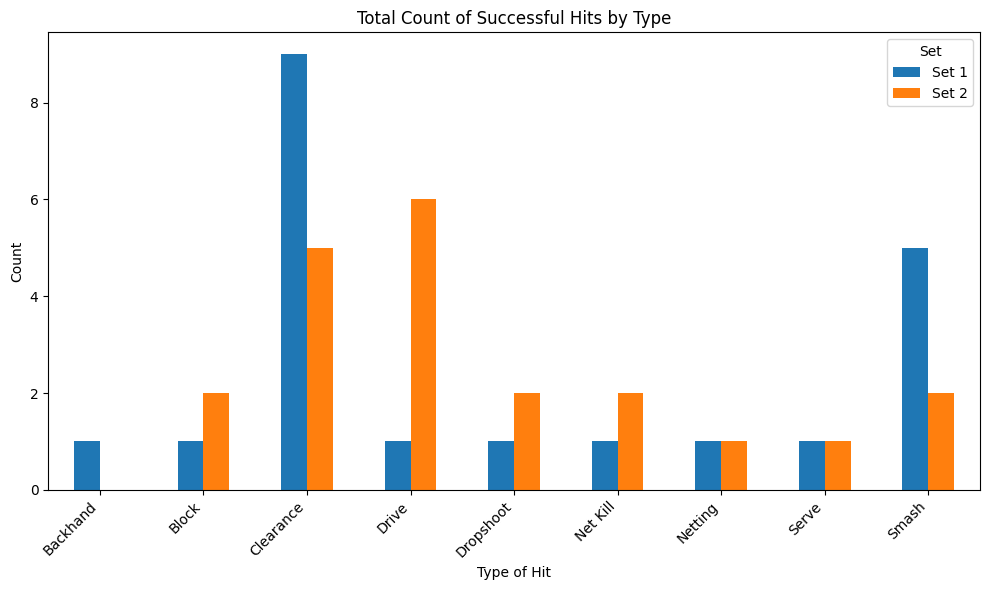

In [ ]:
# Filter for Success points in Set 1 and Set 2
success_set_1 = df[(df['Set'] == 1) & (df['Status'] == 'Success')]
success_set_2 = df[(df['Set'] == 2) & (df['Status'] == 'Success')]

# Calculate the total count of each type of hit for Set 1 and Set 2
set_1_counts = success_set_1['Type of Hit'].value_counts()
set_2_counts = success_set_2['Type of Hit'].value_counts()

# Merge the counts into a single DataFrame
total_counts = pd.DataFrame({
    'Set 1': set_1_counts,
    'Set 2': set_2_counts
}).fillna(0)

# Plot the bar chart
total_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Total Count of Successful Hits by Type')
plt.xlabel('Type of Hit')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend(title='Set')
plt.tight_layout()
plt.show()






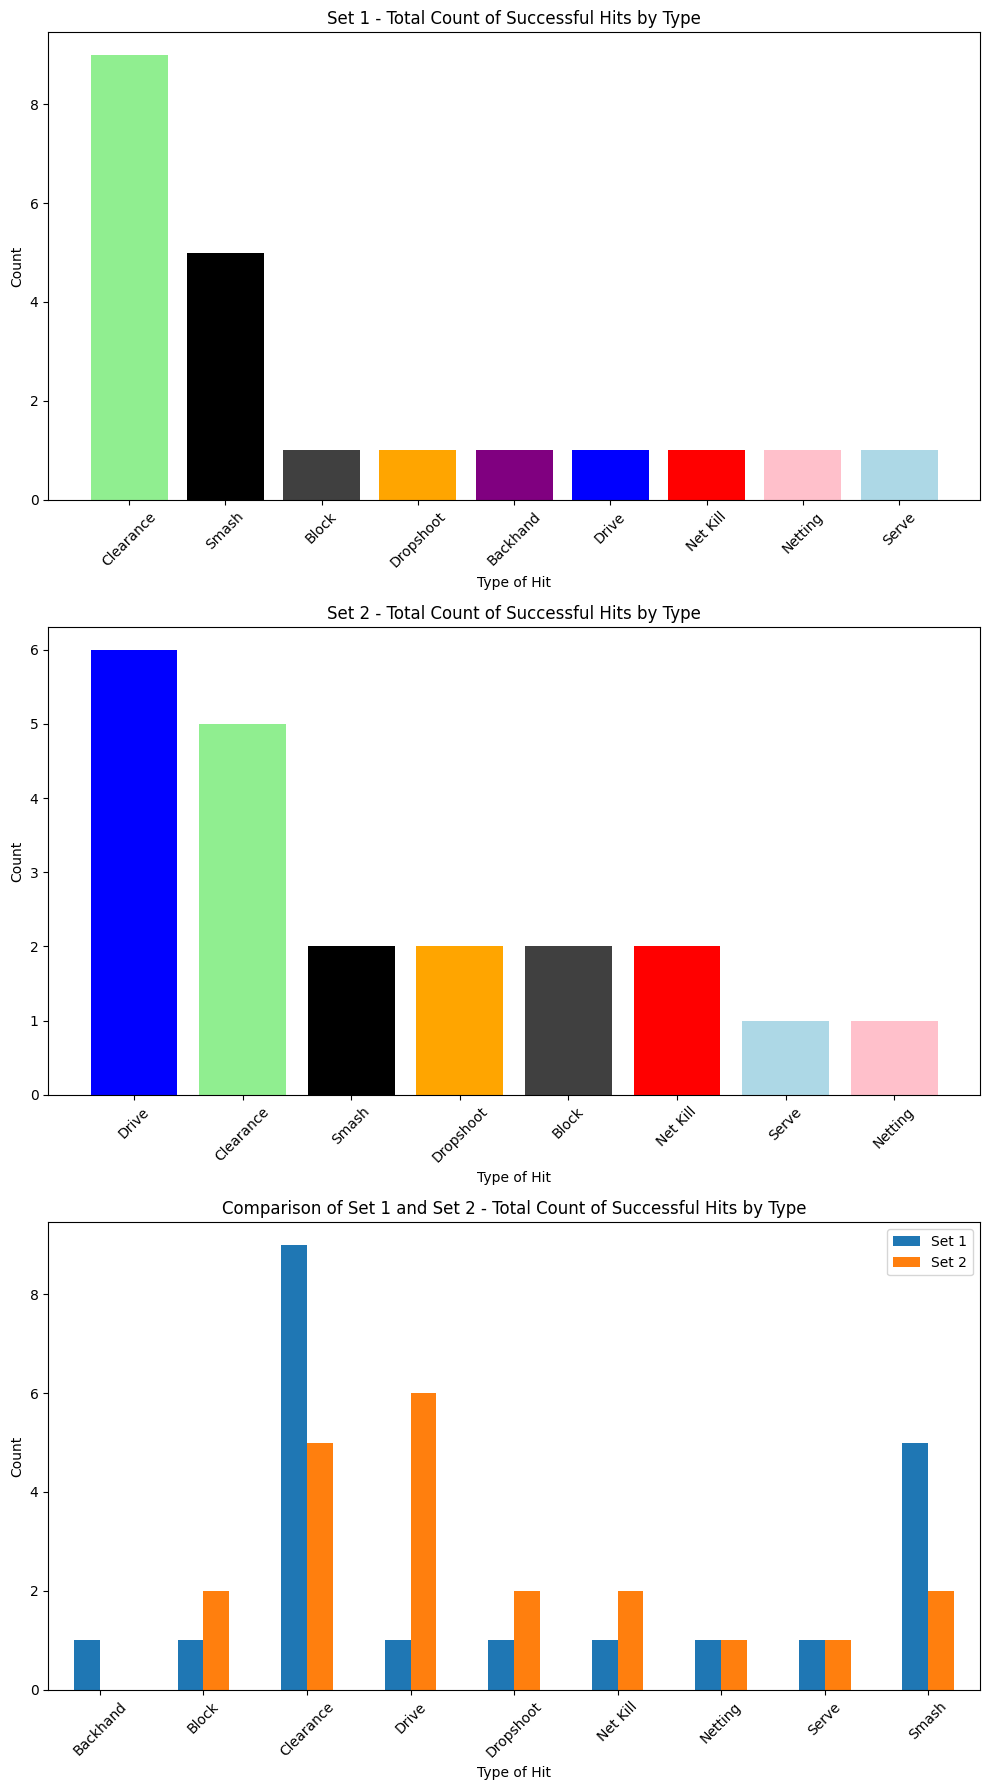

In [ ]:


# Plotting all three charts using subplots
fig, axes = plt.subplots(3, 1, figsize=(10, 18))

# Plotting the first chart (Set 1)
axes[0].bar(set_1_counts.index, set_1_counts.values, color=[hit_colors.get(hit_type, 'black') for hit_type in set_1_counts.index])
axes[0].set_title('Set 1 - Total Count of Successful Hits by Type')
axes[0].set_xlabel('Type of Hit')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=45)

# Plotting the second chart (Set 2)
axes[1].bar(set_2_counts.index, set_2_counts.values, color=[hit_colors.get(hit_type, 'black') for hit_type in set_2_counts.index])
axes[1].set_title('Set 2 - Total Count of Successful Hits by Type')
axes[1].set_xlabel('Type of Hit')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=45)

# Plotting the third chart (Comparison)
total_counts.plot(kind='bar', ax=axes[2])
axes[2].set_title('Comparison of Set 1 and Set 2 - Total Count of Successful Hits by Type')
axes[2].set_xlabel('Type of Hit')
axes[2].set_ylabel('Count')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


Type of Hit
Clearance    9
Smash        5
Block        1
Dropshoot    1
Backhand     1
Drive        1
Net Kill     1
Netting      1
Serve        1
Name: count, dtype: int64


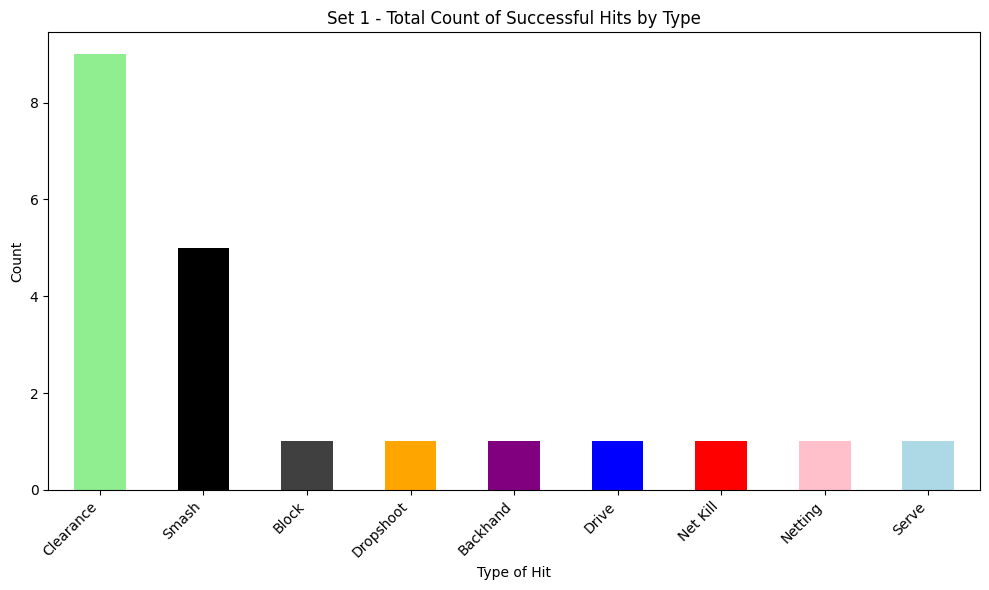

Type of Hit
Drive        6
Clearance    5
Smash        2
Dropshoot    2
Block        2
Net Kill     2
Serve        1
Netting      1
Name: count, dtype: int64


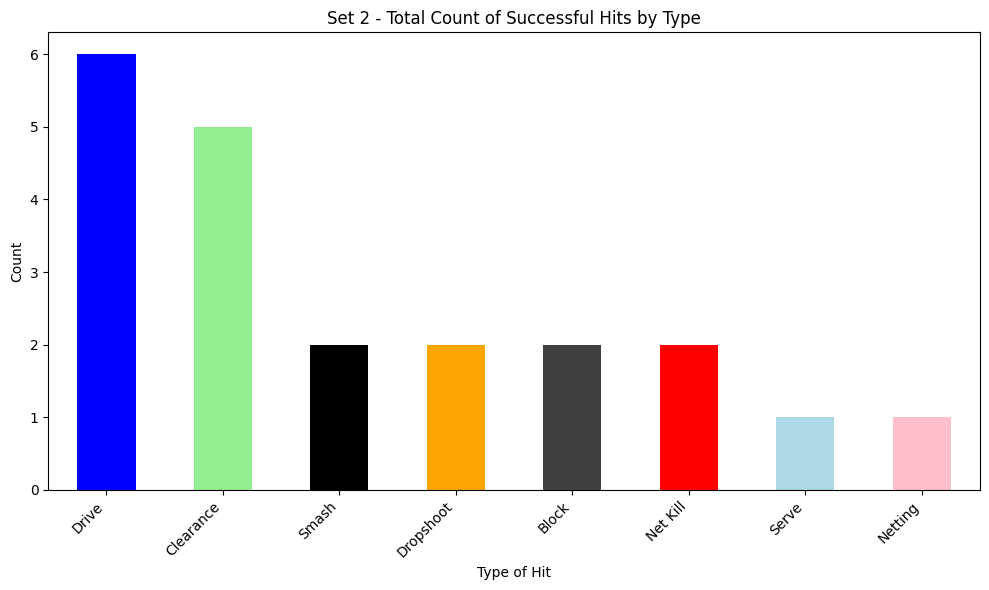

<Figure size 1000x600 with 0 Axes>

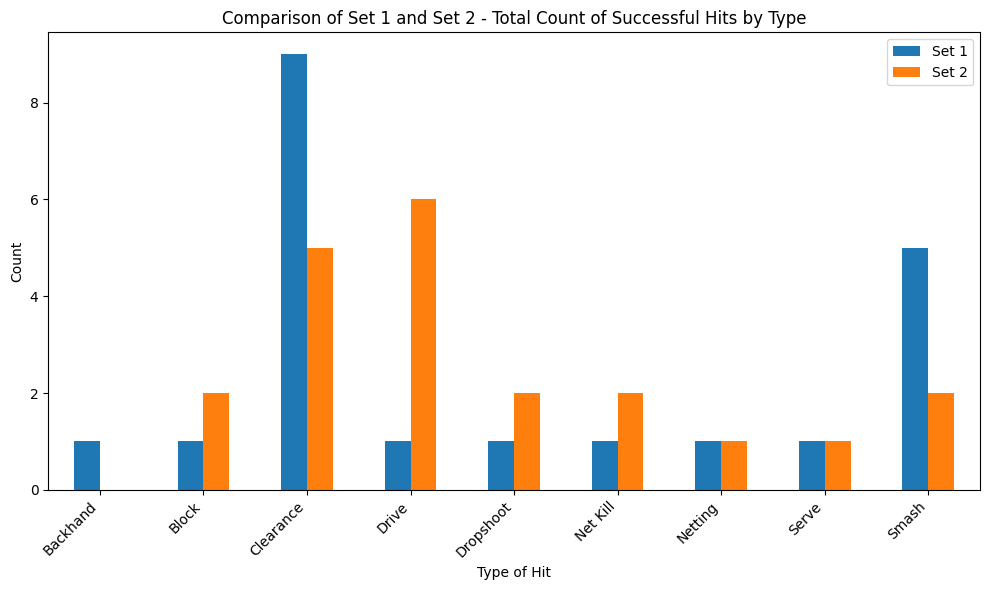

In [76]:
# Calculate the total count of each type of hit for Set 1 and Set 2
set_1_counts = success_points_set_1['Type of Hit'].value_counts()
set_2_counts = success_points_set_2['Type of Hit'].value_counts()

# Merge the counts into a single DataFrame
total_counts = pd.DataFrame({
    'Set 1': set_1_counts,
    'Set 2': set_2_counts
}).fillna(0)

# Create a dictionary to map each type of hit to its corresponding color
hit_colors = {
    'Clearance': 'lightgreen',
    'Drive': 'blue',
    'Netting': 'pink',
    'Smash': 'black',
    'Dropshoot': '#FFA500',
    'Block': '#404040',
    'Backhand': 'purple',
    'Net Kill': 'red',
    'Serve': 'lightblue',
}

print(set_1_counts)
# Plotting the first chart (Set 1)
plt.figure(figsize=(10, 6))
set_1_counts.plot(kind='bar', color=[hit_colors.get(hit_type, 'black') for hit_type in set_1_counts.index])
plt.title('Set 1 - Total Count of Successful Hits by Type')
plt.xlabel('Type of Hit')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print(set_2_counts)
# Plotting the second chart (Set 2)
plt.figure(figsize=(10, 6))
set_2_counts.plot(kind='bar', color=[hit_colors.get(hit_type, 'black') for hit_type in set_2_counts.index])
plt.title('Set 2 - Total Count of Successful Hits by Type')
plt.xlabel('Type of Hit')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Plotting the third chart (Comparison)
plt.figure(figsize=(10, 6))
total_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Comparison of Set 1 and Set 2 - Total Count of Successful Hits by Type')
plt.xlabel('Type of Hit')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()